# **Exploration Mountain Dataset**

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import**

Import modules and library needed

In [2]:
import chardet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### **Prepare Dataset**

In [19]:
with open("/content/drive/MyDrive/Capstone Project/Machine Learning/datasets/mountain.csv", 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large


df = pd.read_csv("/content/drive/MyDrive/Capstone Project/Machine Learning/datasets/mountain.csv", encoding=result['encoding'])
df = df.iloc[0:212, 0:9]  
df.head()

,ID,Nama,Ketinggian,Provinsi,Wilayah,Deskripsi,Aktif (Aktif/Tidak Aktif),Level (Pemula/Mahir),Kota/Kab
0,1,Gunung Patas,1414,Bali,Bali dan Nusa Tenggara,Gunung Patas memiliki ketinggian 1.414 meter d...,Tidak Aktif,Pemula,Buleleng
1,2,Gunung Abang,2151,Bali,Bali dan Nusa Tenggara,Menurut beberapa sumber mengatakan bahwa gunun...,Aktif,Pemula,Bangli
2,3,Gunung Agung,3142,Bali,Bali dan Nusa Tenggara,Gunung Agung adalah gunung tertinggi di pulau ...,Aktif,Mahir,Karangasem
3,4,Gunung Batur,1717,Bali,Bali dan Nusa Tenggara,Gunung Batur merupakan sebuah gunung berapi ak...,Aktif,Pemula,Bangli
4,5,Gunung Batukaru,2276,Bali,Bali dan Nusa Tenggara,Gunung Batukaru adalah gunung tertinggi kedua ...,Tidak Aktif,Pemula,Tabanan


In [20]:
print('Length of dataset mountain :', len(df))

Length of dataset mountain : 212


In [21]:
# Check duplicate data
print("Data duplicated: ", df.duplicated().sum())

if df.duplicated().sum() > 0:
  df_clean = df[~df.duplicated()]
  print('Length of dataset rating after cleaning:', len(df_clean))
else :
  print('No cleaning needed')

Data duplicated:  0
No cleaning needed


## **Exploration**

**Overview**

In [22]:
#Mountain per Wilayah
df_wilayah = df.groupby('Wilayah')['Wilayah'].count()
df_wilayah

Wilayah
Bali dan  Nusa Tenggara     39
Jawa                       134
Sumatra                     39
Name: Wilayah, dtype: int64

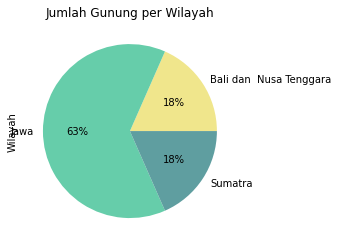

In [23]:
df_wilayah.plot(kind='pie', y='points', autopct='%1.0f%%',
                                colors = ['khaki', 'mediumaquamarine','cadetblue'],
                                title='Jumlah Gunung per Wilayah')

In [24]:
#Mountain per Provinsi
df_provinsi = df.groupby('Provinsi')['Provinsi'].count().sort_values(ascending=False)[:10]
df_provinsi

Provinsi
Jawa Timur             49
Jawa Barat             44
Jawa Tengah            29
Nusa Tenggara Timur    21
Sumatra Barat          12
Bali                   12
Aceh                    8
Lampung                 7
Nusa Tenggara Barat     6
Banten                  5
Name: Provinsi, dtype: int64

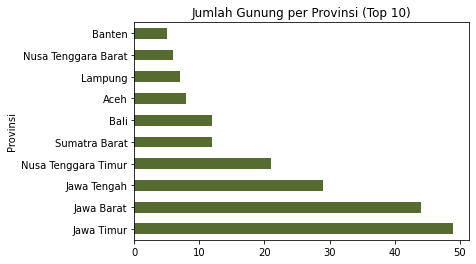

In [26]:
df_provinsi.plot.barh(title='Jumlah Gunung per Provinsi (Top 10)',  color = "darkolivegreen")

**Summary of Mountain Activity**

In [27]:
df_aktif = df.groupby('Aktif (Aktif/Tidak Aktif)')['Aktif (Aktif/Tidak Aktif)'].count().sort_values(ascending=False)
df_aktif

Aktif (Aktif/Tidak Aktif)
Tidak Aktif    138
Aktif           74
Name: Aktif (Aktif/Tidak Aktif), dtype: int64

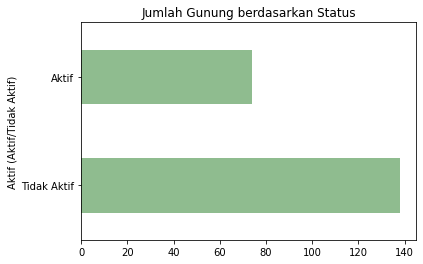

In [28]:
df_aktif.plot.barh(title='Jumlah Gunung berdasarkan Status',  color = "darkseagreen")

**Summary of Difficulty Level**

In [29]:
df_level = df.groupby('Level (Pemula/Mahir)')['Level (Pemula/Mahir)'].count().sort_values(ascending=False)
df_level

Level (Pemula/Mahir)
Pemula    150
Mahir      62
Name: Level (Pemula/Mahir), dtype: int64

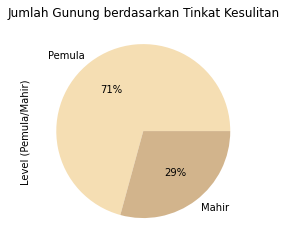

In [31]:
df_level.plot(kind='pie', y='points', autopct='%1.0f%%',
                                colors = ['wheat', 'tan'],
                                title='Jumlah Gunung berdasarkan Tinkat Kesulitan')

**Mountain Altitude**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


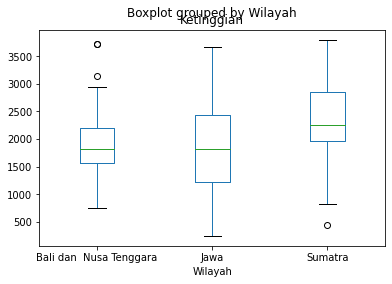

In [32]:
#Comparison of Mountain Altitude by Wilayah
df.boxplot(by ='Wilayah', column =['Ketinggian'], grid = False)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


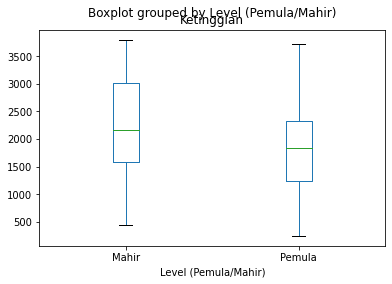

In [33]:
#Comparison of Mountain Altitude by Difficulty Level
df.boxplot(by ='Level (Pemula/Mahir)', column =['Ketinggian'], grid = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


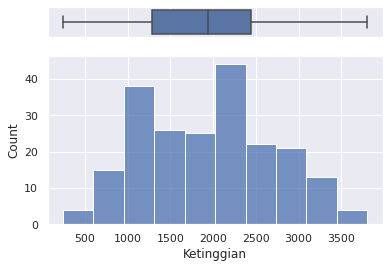

In [34]:
# Box plot and Histogram for Ketinggian
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["Ketinggian"], ax=ax_box)
sns.histplot(data=df, x="Ketinggian", ax=ax_hist)
ax_box.set(xlabel='')
plt.show()